In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from highlight_text import ax_text, fig_text
from pyfonts import load_font
from drawarrow import ax_arrow
from pypalettes import load_cmap
import matplotlib.patches as patches
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.interpolate import make_interp_spline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# file paths in local storage
male_pivot_path = r"D:\Learning\Data Visualization\data\india\population_pyramid\demographic_dividend\data\male_pivot_pyramid_1950_2025.csv"
female_pivot_path = r"D:\Learning\Data Visualization\data\india\population_pyramid\demographic_dividend\data\female_pivot_pyramid_1950_2025.csv"

In [4]:
male = pd.read_csv(male_pivot_path)
female = pd.read_csv(female_pivot_path)

In [5]:
# max population per age group out of all years from 1950-2025 
max_male_per_group = {}

for group in male["Age"].values:
    max_group = float(male[male["Age"]==str(group)].drop(columns=["Age"]).max(axis=1).values)
    max_male_per_group[str(group)] = max_group


max_female_per_group = {}

for group in female["Age"].values:
    max_group = float(female[female["Age"]==str(group)].drop(columns=["Age"]).max(axis=1).values)
    max_female_per_group[str(group)] = max_group


In [6]:
male_max = max(list(max_male_per_group.values()))
female_max = max(list(max_female_per_group.values()))

In [ ]:
# COLORS
cmap_male = load_cmap("blues9")
cmap_female = load_cmap("Burg")
norm = plt.Normalize(1950, 2025)
cmap_title = load_cmap("GeorgiaOKeeffe").colors # get as a list


In [8]:
# AXIS TICKS
y_ticks = list(range(8))
y_ticklabels = ['0-4 years ', '5-11 years ', '12-14 years ',
                '15-24 years ', '25-49 years ', '50+ years ',
                '60+ years ', '80+ years '
    
]

x_ticks = [-300000000, -200000000, -150000000, -100000000, -50000000, 50000000, 100000000, 150000000, 200000000, 300000000]
x_ticklabels = [
    "30 Cr", "20 Cr", "15 Cr", "10 Cr", "5 Cr",
    "5 Cr", "10 Cr", "15 Cr", "20 Cr", "30 Cr"
]

In [11]:
# FONTS
newsreader = load_font(r"https://github.com/google/fonts/blob/main/ofl/newsreader/Newsreader%5Bopsz%2Cwght%5D.ttf?raw=true")
newsread_i = load_font(r"https://github.com/google/fonts/blob/main/ofl/newsreader/Newsreader-Italic%5Bopsz%2Cwght%5D.ttf?raw=true")

neuton = load_font(r"https://github.com/google/fonts/blob/main/ofl/neuton/Neuton-Regular.ttf?raw=true")
neuton_i = load_font(r"https://github.com/google/fonts/blob/main/ofl/neuton/Neuton-Italic.ttf?raw=true")
neuton_b = load_font(r"https://github.com/google/fonts/blob/main/ofl/neuton/Neuton-Bold.ttf?raw=true")

text_style = dict(font=neuton, size=12)

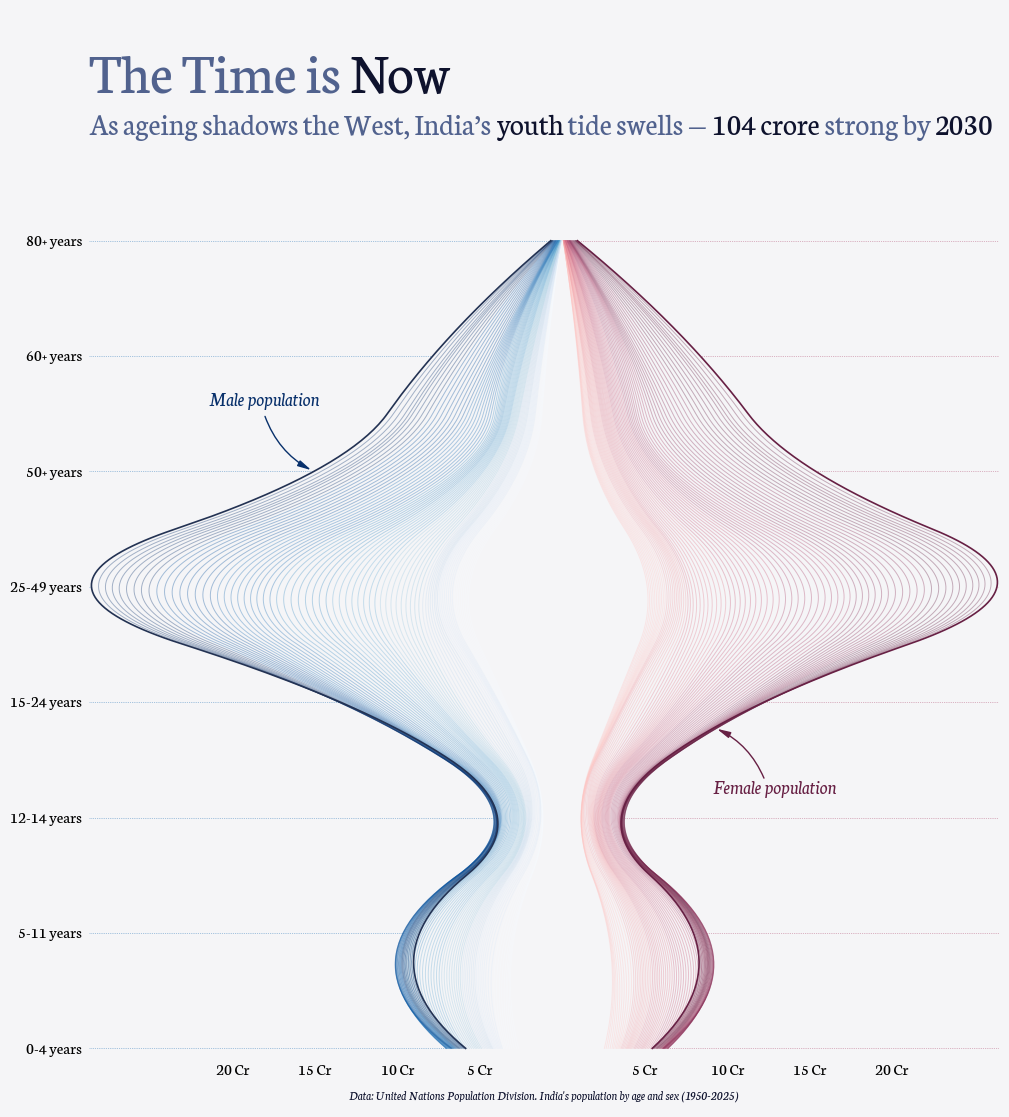

In [12]:
# VISUAL

# CANVAS SET UP
fig, ax = plt.subplots(figsize=(13, 15))
# change background color
bgcolor = "#F5F5F7" 
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
# restrict plot to 85% of canvas space
fig.subplots_adjust(top=0.85, bottom=0.15, left=0.15, right=.85)
# clean up canvas
ax.spines[["top", "right", "left", "bottom"]].set_visible(0)
ax.tick_params(axis="both", which="both", length=0)
ax.ticklabel_format(axis='x', style='plain')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels, **text_style)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels, **text_style)
ax.set_xlim(-male_max*1.005, female_max*1.005)
ax.set_ylim(-0.1,9)

# MAIN PLOT

# Plot Male (left side, mirrored negative)
for yr in range(1950, 2026):
    x_values = -male[str(yr)].values.flatten()  # negative for left side
    y_values = np.arange(8)  # 0 to 7, drop 90+
    x_values_trimmed = x_values[:8]
    # spline = make_interp_spline(y_values, x_values_trimmed, k=1) # sharp edge
    spline = make_interp_spline(y_values, x_values_trimmed, k=2)
    y_smooth = np.linspace(0, 7, 300)
    x_smooth = spline(y_smooth)
    x_smooth = np.clip(x_smooth, -np.inf, 0)

    color = cmap_male(norm(yr))

    if yr < 2025:
        ax.plot(x_smooth, y_smooth, color=color, linewidth=0.7, alpha=0.35, zorder=25) # for smooth aesthetics
        # ax.plot(x_values, y_values, color="steelblue", linewidth=0.7, alpha=0.5) # for sharp aesthetics
    else:
        ax.plot(x_smooth, y_smooth, color="#233253FF", linewidth=1.2, zorder=25) # for smooth aesthetics
        # ax.plot(x_values, y_values, color="navy", linewidth=1.5) # for sharp aesthetics

# Plot Female (right side, positive)
for yr in range(1950, 2026):
    x_values = female[str(yr)].values.flatten()  # positive for right side
    y_values = np.arange(8)  # 0 to 7, drop 90+
    x_values_trimmed = x_values[:8]
    # spline = make_interp_spline(y_values, x_values_trimmed, k=1) # sharp edge
    spline = make_interp_spline(y_values, x_values_trimmed, k=2)
    y_smooth = np.linspace(0, 7, 300)
    x_smooth = spline(y_smooth)
    x_smooth = np.clip(x_smooth, 0, np.inf)
    color = cmap_female(norm(yr))

    if yr < 2025:
        ax.plot(x_smooth, y_smooth, color=color, linewidth=0.7, alpha=0.35) # for smooth aesthetics
        # ax.plot(x_values, y_values, color="lightcoral", linewidth=0.7, alpha=0.5) # for sharp aesthetics
    else:
        ax.plot(x_smooth, y_smooth, color=color, linewidth=1.2) # for smooth aesthetics
        # ax.plot(x_values, y_values, color="darkred", linewidth=1.5) # for sharp aesthetics

# GRID LINES
# for male groups
for y, group in zip(list(range(8)), max_male_per_group.keys()):
    max_x = -1*max_male_per_group.get(str(group))
    ax.plot([-550000000, max_x], [y, y], color=cmap_male.colors[-3],
            linewidth=0.5, linestyle=":", alpha=0.75)
# for female groups    
for y, group in zip(list(range(8)), max_female_per_group.keys()):
    max_x = max_female_per_group.get(str(group))
    ax.plot([max_x, 550000000], [y, y], color=cmap_female.colors[-3],
            linewidth=0.5, linestyle=":", alpha=0.75)


# PLOT DESCRIPTION
# Title
title = "The Time is <Now>"
fig_text(x=0.15, y=.82, s=title, font=neuton, size=42, color=cmap_title[2],
         highlight_textprops=[dict(font=neuton, color=cmap_title[0])])
# Sub-title
sub_title = "As ageing shadows the West, India’s <youth> tide swells — <104 crore> strong by <2030>"
fig_text(x=0.15, y=.78, s=sub_title, font=neuton, size=22, color=cmap_title[2],
         highlight_textprops=[
             dict(font=neuton, color=cmap_title[0]),
             dict(font=neuton, color=cmap_title[0]),
             dict(font=neuton, color=cmap_title[0])])

# LEGEND
# arrow for male pyramid legend
ax_arrow(
    head_position=[-150625131, 5],
    tail_position=[-150625131*1.2, 5.5],
    ax=ax, radius=.2, color=cmap_male.colors[-1],
    fill_head=True, head_width=1.85
)
# arrow for female pyramid legend
ax_arrow(
    head_position=[(122897902.5*.75), 2.78],
    tail_position=[122897902.5, 2.32],
    ax=ax, radius=.2, color=cmap_female.colors[-1],
    fill_head=True, head_width=1.85
)
# text for male curve legend
ax_text(x=-150625131*1.2, y=5.68, s="Male population",
        font=neuton_i, color=cmap_male.colors[-1], ha="center", size=14)
# text for female curve legend
ax_text(x=(122897902.5*1.05), y=2.32, s="Female population",
        font=neuton_i, color=cmap_female.colors[-1], ha="center", size=14)
# text for data source
source_text = "Data: United Nations Population Division. India's population by age and sex (1950-2025)"
fig_text(x=0.5, y=0.13,
         s=source_text, font=neuton_i, size=9,
         color=cmap_title[0], ha="center")


# plt.show()
plt.savefig(r"D:\Learning\Data Visualization\data\india\population_pyramid\demographic_dividend\viz\demographic_dividend.jpeg", dpi=200)

---